In [4]:
from huggingface_hub import snapshot_download

# Load datasets
download_path = "/mnt/data0/drs25/data/"
local_dir = snapshot_download(
    repo_id="mburgjr/GelSight-YoungsModulus",  # Hugging Face dataset repo
    repo_type="dataset",
    local_dir=download_path
)
print("Dataset downloaded to:", local_dir)
"""download_path = "/mnt/data0/drs25/data/"
local_dir = snapshot_download(
    repo_id="facebook/gelsight-force-estimation",  # Hugging Face dataset repo
    repo_type="dataset",
    local_dir=download_path
)
print("Dataset downloaded to:", local_dir)
"""
#files will need to be manually unzipped

Fetching 3 files: 100%|██████████| 3/3 [05:53<00:00, 117.69s/it]


Dataset downloaded to: /mnt/data0/drs25/data


Fetching 91 files: 100%|██████████| 91/91 [06:38<00:00,  4.38s/it]

Dataset downloaded to: /mnt/data0/drs25/data


In [181]:
import gdown
import os
import zipfile
import shutil


def download_and_extract_drive_zip(url, download_path="/mnt/data0/drs25/data/"):
    os.makedirs(download_path, exist_ok=True)
    # Ensure we get a usable direct download link
    if "uc?id=" not in url:
        try:
            file_id = url.split("/d/")[1].split("/")[0]
            url = f"https://drive.google.com/uc?id={file_id}"
        except Exception:
            raise ValueError("Invalid Google Drive link format.")

    zip_file = os.path.join(download_path, "myfile.zip")
    extract_temp = os.path.join(download_path, "temp_extract")
    objects_folder = os.path.join(download_path, "objects")

    gdown.download(url, zip_file, quiet=False)

    os.makedirs(extract_temp, exist_ok=True)
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_temp)

    os.makedirs(objects_folder, exist_ok=True)

    for item in os.listdir(extract_temp):
        src_path = os.path.join(extract_temp, item)
        dst_path = os.path.join(objects_folder, item)

        if os.path.exists(dst_path):
            if os.path.isdir(dst_path):
                shutil.rmtree(dst_path)
            else:
                os.remove(dst_path)
        shutil.move(src_path, dst_path)

    # Cleanup
    shutil.rmtree(extract_temp)
    os.remove(zip_file)  # optional: delete zip after extraction

    print(f"Files extracted to: {objects_folder}")
    return objects_folder

urls = ["https://drive.google.com/uc?id=1ZfwuXom_ngccnyox-ud4b-pOa1zMw-Wr",
        "https://drive.google.com/uc?id=1ZAZ4y2pCI7YWOSx5VI7tNlJ2EJpZy1F2",
        "https://drive.google.com/uc?id=1tCoHd7qf4AAXWMfLCRecpnimJcz52sRv",
        "https://drive.google.com/uc?id=1VNQyOW1ooBClp4QogJJqh7SHN2zGCq1E",
        "https://drive.google.com/uc?id=1HVTtGYX_Doj_xk_TIyFEd82njQ1DhA8a",
        "https://drive.google.com/uc?id=1Hdab1i4UHrkUAJ5RtDigpMHfx868aOtD"]

other_urls=["https://drive.google.com/file/d/1nFePHk4CCHT0o31aNIivueqM8zWoQXXW/view?usp=sharing",
            "https://drive.google.com/file/d/1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm/view?usp=sharing",
            "https://drive.google.com/file/d/1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm/view?usp=sharing",
            "https://drive.google.com/file/d/1WcSEomKsUNSQMOscxRkC14opf2PA9dxO/view?usp=sharing",
            "https://drive.google.com/file/d/1o-qZh8bU65cHKcBY18iFXlMyUiPulkyN/view?usp=sharing",
            "https://drive.google.com/file/d/1qI1RufCRG_UkepDflnStQVg085nFzZNJ/view?usp=sharing",
            "https://drive.google.com/file/d/1AWhCIf2WYIVVnxlL2eL0DXRP60IHRTKh/view?usp=sharing",
            "https://drive.google.com/file/d/1eRBESy4wxIKbGD1d-SZrCuYBlh9Ukfdf/view?usp=sharing",
            "https://drive.google.com/file/d/1UtiJM-PtXa5OGErGIC4M60zpHlb4XM5d/view?usp=sharing",
            "https://drive.google.com/file/d/1pSNc9f_b7akubCMHkn572qloV4FnU9Fd/view?usp=sharing",
            "https://drive.google.com/file/d/10bQiES46hooZrPw5MaUMXvfeaSQxcVva/view?usp=sharing",
            "https://drive.google.com/file/d/10bQiES46hooZrPw5MaUMXvfeaSQxcVva/view?usp=sharing",
            "https://drive.google.com/file/d/1OSt_RFXQo-ad5jAIxaHeDeUxRBhO-hNw/view?usp=sharing",
            "https://drive.google.com/file/d/1_XL0YKCwQUQWrFt9XMjdNcaqh9ss6Fdp/view?usp=sharing",
            "https://drive.google.com/file/d/17YrIXvepLBlh9RQSexNdDwR3L78NoG39/view?usp=sharing",
            "https://drive.google.com/file/d/1YYlTtBVNQ8uEUtAhxH_wTkokimK-SRQK/view?usp=sharing",
            "https://drive.google.com/file/d/1FwlqJG9prxv7qsaAWJk7SZsDRx_OjL0l/view?usp=sharing",
            "https://drive.google.com/file/d/1w1ybTkEPAnq5UTbMzwXGZBqikMbggIoK/view?usp=sharing",
            "https://drive.google.com/file/d/1dqXYqCcImpFzxox9XKA_LONVJz7gswIZ/view?usp=sharing",
            "https://drive.google.com/file/d/1KKdWX4z0HGvt_bfcLM_peBqCtowbsyVh/view?usp=sharing",]

for url in other_urls:
    download_and_extract_drive_zip(url.replace("file/d/","uc?id=").replace("/view?usp=sharing",""))

Downloading...
From (original): https://drive.google.com/uc?id=1nFePHk4CCHT0o31aNIivueqM8zWoQXXW
From (redirected): https://drive.google.com/uc?id=1nFePHk4CCHT0o31aNIivueqM8zWoQXXW&confirm=t&uuid=8915b96b-7a1c-48c4-a40b-36b63c1b7104
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.3M/66.3M [00:00<00:00, 93.8MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm
From (redirected): https://drive.google.com/uc?id=1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm&confirm=t&uuid=8ea66ce8-abe8-4149-a67b-fbe79a246e19
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 64.2M/64.2M [00:01<00:00, 39.4MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm
From (redirected): https://drive.google.com/uc?id=1-l7U06Puh47WBL6FvDtOvttBF0qkkCJm&confirm=t&uuid=50fd1e87-9222-4d5e-89ca-77ba50270a2e
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 64.2M/64.2M [00:00<00:00, 71.4MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1WcSEomKsUNSQMOscxRkC14opf2PA9dxO
From (redirected): https://drive.google.com/uc?id=1WcSEomKsUNSQMOscxRkC14opf2PA9dxO&confirm=t&uuid=39f95a27-9228-4c99-a74f-21fa34e993cb
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.9M/66.9M [00:01<00:00, 61.4MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1o-qZh8bU65cHKcBY18iFXlMyUiPulkyN
From (redirected): https://drive.google.com/uc?id=1o-qZh8bU65cHKcBY18iFXlMyUiPulkyN&confirm=t&uuid=42b1145c-fb13-42d9-a027-a7ef01cc3dd7
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.9M/66.9M [00:01<00:00, 58.4MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1qI1RufCRG_UkepDflnStQVg085nFzZNJ
From (redirected): https://drive.google.com/uc?id=1qI1RufCRG_UkepDflnStQVg085nFzZNJ&confirm=t&uuid=2d7d44e5-0337-4f21-8db4-3a58868cf926
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.3M/66.3M [00:01<00:00, 47.5MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1AWhCIf2WYIVVnxlL2eL0DXRP60IHRTKh
From (redirected): https://drive.google.com/uc?id=1AWhCIf2WYIVVnxlL2eL0DXRP60IHRTKh&confirm=t&uuid=7d5c7b51-8741-4afa-9673-629a9df91801
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 64.5M/64.5M [00:01<00:00, 52.7MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1eRBESy4wxIKbGD1d-SZrCuYBlh9Ukfdf
From (redirected): https://drive.google.com/uc?id=1eRBESy4wxIKbGD1d-SZrCuYBlh9Ukfdf&confirm=t&uuid=660a8cd4-40ed-466f-843e-23949cf4b4b9
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 63.2M/63.2M [00:01<00:00, 47.9MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1UtiJM-PtXa5OGErGIC4M60zpHlb4XM5d
From (redirected): https://drive.google.com/uc?id=1UtiJM-PtXa5OGErGIC4M60zpHlb4XM5d&confirm=t&uuid=37c8ea6d-62b7-4fab-8717-b644c44f9bd0
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 65.8M/65.8M [00:02<00:00, 26.1MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1pSNc9f_b7akubCMHkn572qloV4FnU9Fd
From (redirected): https://drive.google.com/uc?id=1pSNc9f_b7akubCMHkn572qloV4FnU9Fd&confirm=t&uuid=28b2ab01-9a03-4723-8743-4d8022a98991
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.8M/66.8M [00:01<00:00, 53.2MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=10bQiES46hooZrPw5MaUMXvfeaSQxcVva
From (redirected): https://drive.google.com/uc?id=10bQiES46hooZrPw5MaUMXvfeaSQxcVva&confirm=t&uuid=35dc8c56-693e-47e6-98cb-ebc9389f6f39
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 67.3M/67.3M [00:00<00:00, 71.8MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=10bQiES46hooZrPw5MaUMXvfeaSQxcVva
From (redirected): https://drive.google.com/uc?id=10bQiES46hooZrPw5MaUMXvfeaSQxcVva&confirm=t&uuid=cbc06cd3-ee5b-451f-ba54-4966b21e71a1
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 67.3M/67.3M [00:01<00:00, 59.9MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1OSt_RFXQo-ad5jAIxaHeDeUxRBhO-hNw
From (redirected): https://drive.google.com/uc?id=1OSt_RFXQo-ad5jAIxaHeDeUxRBhO-hNw&confirm=t&uuid=ee826bc5-4942-4457-a16d-9096ca510c1d
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.5M/66.5M [00:01<00:00, 51.9MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1_XL0YKCwQUQWrFt9XMjdNcaqh9ss6Fdp
From (redirected): https://drive.google.com/uc?id=1_XL0YKCwQUQWrFt9XMjdNcaqh9ss6Fdp&confirm=t&uuid=6374adf5-091e-4d1e-af7d-ac8995ef09ff
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.5M/66.5M [00:01<00:00, 49.8MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=17YrIXvepLBlh9RQSexNdDwR3L78NoG39
From (redirected): https://drive.google.com/uc?id=17YrIXvepLBlh9RQSexNdDwR3L78NoG39&confirm=t&uuid=367ee5ef-d173-4f75-bc69-14f1426d94b4
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 66.3M/66.3M [00:01<00:00, 53.0MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1YYlTtBVNQ8uEUtAhxH_wTkokimK-SRQK
From (redirected): https://drive.google.com/uc?id=1YYlTtBVNQ8uEUtAhxH_wTkokimK-SRQK&confirm=t&uuid=8498ad4f-19f4-4e08-8474-f738a9dfee3a
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 67.6M/67.6M [00:00<00:00, 69.3MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1FwlqJG9prxv7qsaAWJk7SZsDRx_OjL0l
From (redirected): https://drive.google.com/uc?id=1FwlqJG9prxv7qsaAWJk7SZsDRx_OjL0l&confirm=t&uuid=b9c9a5c5-e081-4584-a59d-d93a69716f66
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 65.6M/65.6M [00:01<00:00, 61.3MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1w1ybTkEPAnq5UTbMzwXGZBqikMbggIoK
From (redirected): https://drive.google.com/uc?id=1w1ybTkEPAnq5UTbMzwXGZBqikMbggIoK&confirm=t&uuid=6a6b9efc-0038-4bd9-b848-99d005aa3f73
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 68.3M/68.3M [00:01<00:00, 59.1MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1dqXYqCcImpFzxox9XKA_LONVJz7gswIZ
From (redirected): https://drive.google.com/uc?id=1dqXYqCcImpFzxox9XKA_LONVJz7gswIZ&confirm=t&uuid=13046cfe-f8e5-4446-b847-12c4f907522d
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 67.3M/67.3M [00:01<00:00, 61.2MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


Downloading...
From (original): https://drive.google.com/uc?id=1KKdWX4z0HGvt_bfcLM_peBqCtowbsyVh
From (redirected): https://drive.google.com/uc?id=1KKdWX4z0HGvt_bfcLM_peBqCtowbsyVh&confirm=t&uuid=2bedfbb8-6d6c-44fc-a24b-4ae3e0ac482a
To: /mnt/data0/drs25/data/myfile.zip
100%|██████████| 69.5M/69.5M [00:01<00:00, 54.9MB/s]


Files extracted to: /mnt/data0/drs25/data/objects


In [ ]:
aligned_data = []
trajectory=forces['trajectories'][1]
for i, frame in enumerate(frames):
    if i < len(trajectory['forces']):
        aligned_data.append({
            'image': frame,
            'force': trajectory['forces'][i],
            'slip': trajectory['slip_label'][i]
        })

trajectory_num = 1  
trajectory = forces['trajectories'][trajectory_num]

traj_forces = trajectory['forces'] 
traj_slip = trajectory['slip_label']
print(len(frames), len(traj_forces), len(traj_slip))
len(frames) % len(traj_forces)

5000 41 41


39

## Inspect and Process data

17288 17288
dict_keys(['indexes', 'forces', 'forces_slip', 'poses', 'delta_forces', 'delta_mag_shear', 'delta_mag_normal', 'slip_label', 'coef_friction'])
23


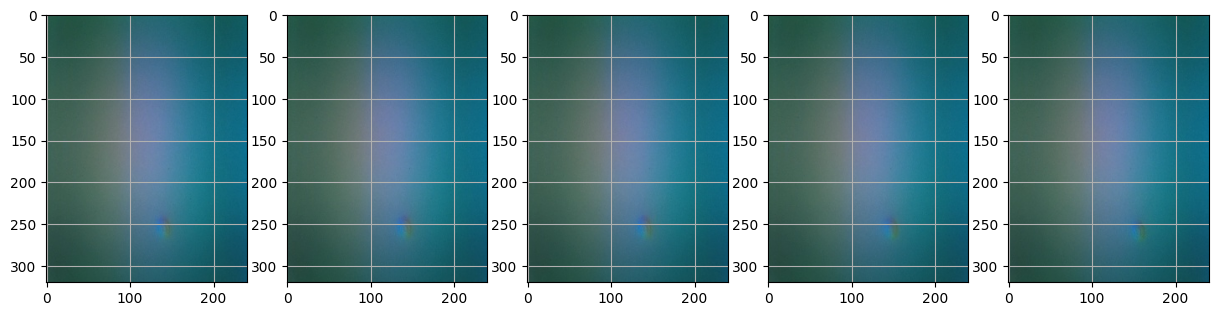

[[-0.00443221 -0.00231041  0.16037084]
 [-0.00479696 -0.00231752  0.16415005]
 [-0.00513948 -0.00239047  0.16759209]
 [-0.00555316 -0.00245987  0.17168356]
 [-0.00594638 -0.00247944  0.17545832]
 [-0.00623107 -0.00250969  0.17807744]
 [-0.00645348 -0.00252748  0.1803398 ]
 [-0.0065976  -0.00249456  0.18148655]
 [-0.00664386 -0.00246076  0.18154171]
 [-0.00500514  0.00342602  0.18141805]
 [-0.00139763  0.03252095  0.18130062]
 [ 0.00318849  0.05784023  0.17978021]
 [ 0.00862065  0.08510249  0.17810946]
 [ 0.01321478  0.11150001  0.17622075]
 [ 0.0155928   0.12676631  0.17118536]
 [ 0.01630184  0.121295    0.16517492]
 [ 0.01587392  0.11696332  0.15883532]
 [ 0.01452166  0.10722171  0.15138277]
 [ 0.01443982  0.10135184  0.14364375]
 [ 0.01428146  0.09882614  0.13718138]
 [ 0.01389713  0.0910115   0.13097344]
 [ 0.01374234  0.08870821  0.12629391]
 [ 0.01294877  0.08706949  0.1206758 ]]


In [133]:
print(len(forces['in_contact']),len(frames)+len(frames1)+len(frames2)+len(frames3))
all_frames = frames + frames1 + frames2 + frames3
print(forces['trajectories'][1].keys())
trajectory = forces['trajectories'][2]
traj_frames = [load_bin_image(all_frames[i]) for i in trajectory['indexes']]
traj_forces = trajectory['forces']
traj_slip = trajectory['slip_label']

assert len(traj_frames) == len(traj_forces) == len(traj_slip)
print(len(traj_frames))
plt.figure(figsize=(15,5))
for i,j in enumerate(range(0,len(traj_frames),4)):
    try:
        plt.subplot(1,len(traj_frames)//4,i+1)
        #plt.axis("off")
        plt.imshow(traj_frames[j])
        plt.grid(True)
    except:
        pass

plt.show()


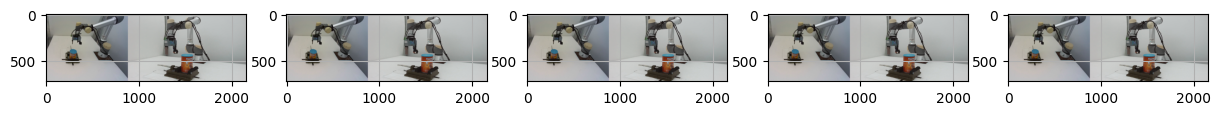

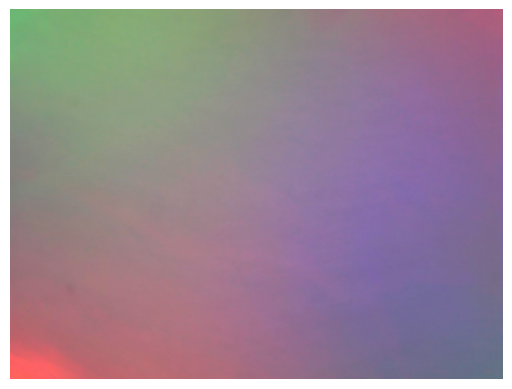

(775830, 3)


,Time,x,y,z,qx,qy,qz,qw
0,1630685566072853,0.089980,0.543000,0.250006,-0.503503,-0.503697,0.493683,-0.499051
1,1630685577110420,0.049157,0.542973,0.250060,-0.506536,-0.502134,0.493207,-0.498026
2,1630685582348678,0.090007,0.543064,0.234102,-0.507121,-0.501895,0.493321,-0.497558
3,1630685593266446,0.048996,0.543076,0.234298,-0.509137,-0.499213,0.493844,-0.497680
4,1630685599814490,0.090020,0.543061,0.218400,-0.509686,-0.498885,0.494166,-0.497126


In [184]:
example_file="/mnt/data0/drs25/data/objects/002_master_chef_can/"

import cv2 
import matplotlib.pyplot as plt 

cap = cv2.VideoCapture(example_file+'002_master_chef_can.mp4')
plt.figure(figsize=(15,5))
for i in range(5):
    ret, frame = cap.read()
    plt.subplot(1,5,i+1)
    #plt.axis("off")
    plt.imshow(frame)
    plt.grid(True)

plt.show()

################################
image_example=example_file+"/gelsight/gelsight_14_1630685745926433.jpg" 
im = cv2.imread(image_example, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis("off")
plt.show()
import numpy as np 

ar=np.load(example_file+"/pc/pc_0_1630685523134474.npy")
print(ar.shape)

import pandas as pd 

df = pd.read_csv(example_file+"robot.csv")
df.head()



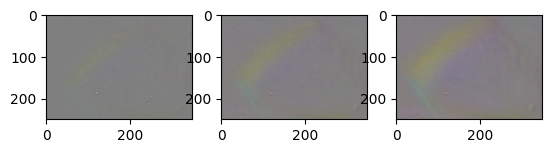

array([ 7.69503348, 12.31077621, 26.4009184 ])

In [3]:
import pickle
import matplotlib.pyplot as plt
def load_pickle_dataset(file_dataset):
    with open(file_dataset, "rb") as f:
        all_frames = pickle.load(f)
    return all_frames

example_file="/mnt/data0/drs25/data/gelsight_youngs_modulus_dataset/foam_rod/grasp=0/augmentation=0/RGB.pkl"
p=load_pickle_dataset(example_file)
plt.subplot(1,3,1)
plt.imshow(p[0])
plt.subplot(1,3,2)
plt.imshow(p[1])
plt.subplot(1,3,3)
plt.imshow(p[2])
plt.show()
example_file="/mnt/data0/drs25/data/gelsight_youngs_modulus_dataset/foam_rod/grasp=0/augmentation=0/forces.pkl"
p=load_pickle_dataset(example_file)
p



# sort data

In [4]:
import os
import pickle
import cv2
import numpy as np
import io
import matplotlib.pyplot as plt
def load_pickle_dataset(file_dataset):
    with open(file_dataset, "rb") as f:
        all_frames = pickle.load(f)
    return all_frames

def load_bin_image(io_buf):
    # Convert bytes buffer to a NumPy array
    nparr = np.frombuffer(io_buf, np.uint8)
    # Decode image with OpenCV
    img = cv2.imdecode(nparr, cv2.IMREAD_UNCHANGED)  # keeps original channels
    return img
import json
with open("/its/home/drs25/Tactile_Language_Model/data/texture_desciptions.json", "r") as f:
    texture_descriptions = json.load(f)
print(texture_descriptions)

{'acrylic_hex': 'Hexagonal piece of smooth transparent acrylic.', 'acrylic_piece': 'Small flat piece of clear acrylic plastic.', 'allen_key': 'Metal L-shaped tool with smooth, hard surface.', 'allen_key_medium': 'Medium-sized metal L-shaped tool.', 'allen_key_small': 'Small metal L-shaped tool.', 'aluminum_cylinder': 'Smooth cylindrical aluminum rod.', 'aluminum_cylinder_etched': 'Cylindrical aluminum rod with etched patterns.', 'aluminum_cylinder_wide': 'Wide cylindrical aluminum rod, smooth surface.', 'aluminum_hex': 'Hexagonal aluminum piece with metallic finish.', 'aluminum_horse': 'Aluminum object shaped like a horse, smooth.', 'aluminum_plate_waterjet': 'Flat aluminum plate with waterjet-cut edges.', 'aluminum_square': 'Square aluminum rod, smooth metallic surface.', 'aluminum_square_rod': 'Square-section aluminum rod.', 'aluminum_stand': 'Aluminum stand with flat and rigid surfaces.', 'angle_bracket': 'Metal L-shaped bracket for construction.', 'angle_bracket_long': 'Long L-shap

In [5]:
def loadData(path):
    forces=load_pickle_dataset(path+'dataset_slip_forces.pkl')
    other_file = [f for f in os.listdir(path) if "org" not in f and "slip" not in f]
    other_file.sort()
    #get other files
    images=[]
    for i in range(len(other_file)):
        images+=load_pickle_dataset(path+other_file[i])
    temp=[]
    y=[]
    min_=100
    for event in forces['trajectories']:
        trajectory=forces['trajectories'][event]
        in_contact=forces['in_contact']
        traj_forces = trajectory['forces']
        traj_slip = trajectory['slip_label']
        #print(len(trajectory['indexes']),len(traj_slip),len(in_contact))
        #assert len(trajectory['indexes']) == len(traj_forces),"oh dear"
        temp.append([load_bin_image(images[i]) for i in trajectory['indexes']])
        y.append([traj_forces,traj_slip])
        if len(temp[-1])<min_:min_=len(temp[-1])
    #now the reshuffle 
    X, force, slip = [], [], []
    for seq, label in zip(temp, y):
        n = len(seq)
        offset = len(seq) - len(label[0])  # usually 5
        # cut into chunks of size min_
        for i in range(0, n, min_):
            chunk = seq[i:i+min_]
            if len(chunk) == min_- offset:   # keep only full-size chunks
                X.append(chunk)
                force.append(label[0][i:i+min_])
                slip.append(label[1][i:i+min_])
    X=np.array(X)
    x, t, h, w, c = X.shape
    arr_combined = X.reshape(x*t, h, w, c)
    X = np.dot(arr_combined[..., :3], [0.2989, 0.5870, 0.1140])
    force=np.array(force)
    force = np.repeat(force, t, axis=0)  # shape (x*t,)
    slip=np.array(slip)
    slip = np.repeat(slip, t, axis=0)  # shape (x*t,)
    return X,force,slip

X,force,slip=loadData("/mnt/data0/drs25/data/FORCE/flat/batch_1/")
#"/mnt/data0/drs25/data/FORCE/sphere/batch_1/"
print(X.shape)
print(force.shape)
print(slip.shape)

(66, 320, 240)
(66, 1, 3)
(66, 1)


In [6]:
import os
def generate_dataset(parent):
    other_file = [f for f in os.listdir(parent) if "." not in f and "assets" not in f]
    X=[]
    y=[]
    for i,objects in enumerate(other_file): #loop through files
        object_path=parent+"/"+objects+"/"
        batches=os.listdir(object_path)
        for batch in batches: #loop through batches
            try:
                a,b,c=loadData(object_path+batch+"/") #gather and label data
                X.append(a)
                y_prime=[]
                for j in range(len(b)):
                    y_prime.append(objects+" shape, force "+str(np.average(b[j]))+" newtons, slip "+str(int(np.max(c[j]))))
                y+=y_prime
                print(object_path+batch,"passed")
            except Exception as e:
                print(object_path+batch,"failed")
                #print(e)
    sizes=[]
    for i in range(len(X)):
        sizes.append(X[i].shape[1])
    min_=min(sizes)
    for i in range(len(X)):
        X[i]=X[i][:,:min_]
    X = np.concatenate(X, axis=0)
    return X,y


In [7]:

def recurrent_step(path):
    X=[]
    y=[]
    if os.path.exists(path):
        pathe=[f for f in os.listdir(path) if "org" not in f and "slip" not in f]
        for p in pathe:
            if ".pkl" not in p:
                x,y_=recurrent_step(path+"/"+p+"/")
                X+=x 
                y+=y_
            else:
                X.append(load_pickle_dataset(path+"/RGB.pkl").astype(np.uint8))
                y.append([load_pickle_dataset(path+"/forces.pkl"),
                        load_pickle_dataset(path+"/elastic_estimate.pkl")])
    return X,y

def gointodata(path,grey=True):
    textures = [f for f in os.listdir(path) if "org" not in f and "slip" not in f]
    X=[]
    y=[]
    print("There are "+str(len(textures))+" textures")
    for texture in textures[0:100]:
        x,y_=recurrent_step(path+"/"+texture)
        og_x=len(x)
        if grey:
            arr=np.array(x)
            x, t, h, w, c = arr.shape
            arr_combined = arr.reshape(x*t, h, w, c)  # shape: (x, t*h, w, 3)
            x = np.dot(arr_combined[..., :3], [0.2989, 0.5870, 0.1140]) 
        if len(X)==0: X=x 
        else: X=np.concatenate([X,x],axis=0)
        for i in range(og_x):
            for j in range(len(x)//og_x):
                try:
                    y.append("Texture "+texture+", force "+str(np.average(y_[i][0]))+", elastic force "+str(np.average(y_[i][1]))+", text description: "+texture_descriptions[texture])
                except:
                    y.append("Texture "+texture+", force "+str(np.average(y_[i][0]))+", elastic force "+str(np.average(y_[i][1])))

        print("done",texture)
    
    return np.array(X),y
#x,y=gointodata("/mnt/data0/drs25/data/gelsight_youngs_modulus_dataset/")  

In [8]:
def read_all_images(path):
    files=os.listdir(path)
    files.sort()
    X=[]
    for i in range(len(files)):
        if ".jpg" in files[i]:
            im = cv2.imread(path+"/"+files[i], cv2.COLOR_BGR2RGB)
            X.append(im.astype(np.uint8))
    return np.array(X)


def realYCB(path):
    files = os.listdir(path)
    X=np.array([])
    y=[]
    for object_ in files:
        path_=path+"/"+object_+"/gelsight" 
        x=read_all_images(path_)
        x = np.dot(x[..., :3], [0.2989, 0.5870, 0.1140]) 
        if len(X)==0: X=x.copy()
        else: X=np.concatenate([X,x],axis=0)
        name="_".join(object_.split("_")[1:])
        print(name)
        for i in range(len(x)):
            y.append("object "+name+", text description: "+texture_descriptions[name])
    return X,y


In [9]:
x1,y1=generate_dataset("/mnt/data0/drs25/data/FORCE/")
x2,y2=gointodata("/mnt/data0/drs25/data/gelsight_youngs_modulus_dataset/")  
x3,y3=realYCB("/mnt/data0/drs25/data/objects/")

/mnt/data0/drs25/data/FORCE//flat/batch_1 passed
/mnt/data0/drs25/data/FORCE//flat/batch_2 passed
/mnt/data0/drs25/data/FORCE//sharp/batch_1 passed
/mnt/data0/drs25/data/FORCE//sharp/batch_2 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_1 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_2 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_3 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_4 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_5 passed
/mnt/data0/drs25/data/FORCE//sphere/batch_6 passed
There are 286 textures
done acrylic_hex
done acrylic_piece
done allen_key
done allen_key_medium
done allen_key_small
done aluminum_cylinder
done aluminum_cylinder_etched
done aluminum_cylinder_wide
done aluminum_hex
done aluminum_horse
done aluminum_plate_waterjet
done aluminum_square
done aluminum_square_rod
done aluminum_stand
done angle_bracket
done angle_bracket_long
done apple
done baby_lego_1
done baby_lego_2
done baby_lego_3
done baby_toy_star
done baby_toy_triangle
done baby_toy_x
do

In [ ]:
print(x1.shape,x2.shape,x3.shape)
print(len(y1),len(y2),len(y3))

print(y1[0])
print(y2[0])
print(y3[0])



(66052, 320, 240) (32880, 250, 350) (1240, 480, 640)
66052 32880 1240
flat shape, force 0.04884147333599398 newtons, slip 1
Texture acrylic_hex, force 19.386136263923447, elastic force 72969844769.11276, text description: Hexagonal piece of smooth transparent acrylic.
object master_chef_can, text description: Small metal can with smooth, slightly curved surface and printed label.


## Visualise dataset

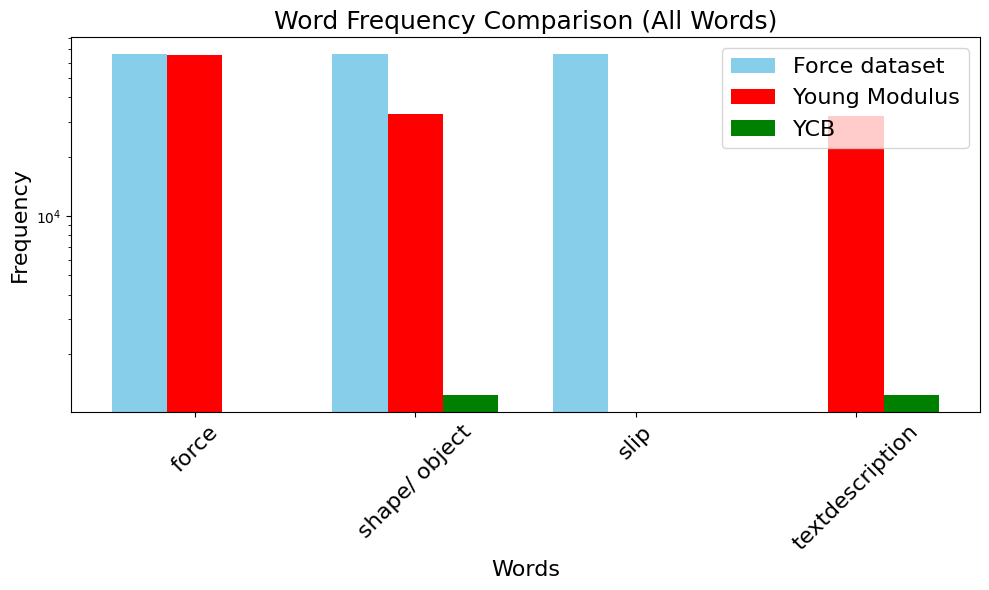

In [ ]:
import re
import matplotlib.pyplot as plt

def process(dataset):
    counts = {}
    for string in dataset:
        # remove numbers, dashes, spaces
        string=string.split(":")[0]
        cleaned = re.sub(r"\d+(\.\d+)?", "", string).replace("-", "").replace(" ", "")
        for item in cleaned.split(","):
            if not item: 
                continue
            if "shape" in item.lower() or "object" in item.lower() or "texture" in item.lower():
                item="shape/ object"
            if "force" in item.lower():
                item="force"
            counts[item] = counts.get(item, 0) + 1
    return counts

classes  = process(y1)
classes2 = process(y2)
classes3 = process(y3)

# --- Only keep COMMON keys ---
all_keys = sorted(set(classes.keys()) | set(classes2.keys()) | set(classes3.keys()))



vals1 = [classes.get(k, 0) for k in all_keys]
vals2 = [classes2.get(k, 0) for k in all_keys]
vals3 = [classes3.get(k, 0) for k in all_keys]

# --- Plot ---
x = np.arange(len(all_keys))
width = 0.25  # smaller width for 3 bars

plt.figure(figsize=(10,6))
plt.bar(x - width, vals1, width, color="skyblue", label="Force dataset")
plt.bar(x, vals2, width, color="red", label="Young Modulus")
plt.bar(x + width, vals3, width, color="green", label="YCB")

plt.xticks(x, all_keys, fontsize=16,rotation=45)
plt.xlabel("Words", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.yscale("log")  # optional
plt.title("Word Frequency Comparison (All Words)", fontsize=18)
#plt.grid(True, axis="y", which="both")
plt.legend(loc="upper right", fontsize=16)
plt.tight_layout()
plt.savefig("/its/home/drs25/Tactile_Language_Model/data/plots/wordfreq.pdf")
plt.show()

{'shape/ object': 66052, 'force': 66052, 'slip': 66052}
{'shape/ object': 32880, 'force': 65760, 'textdescription': 32016}
{'shape/ object': 1240, 'textdescription': 1240}


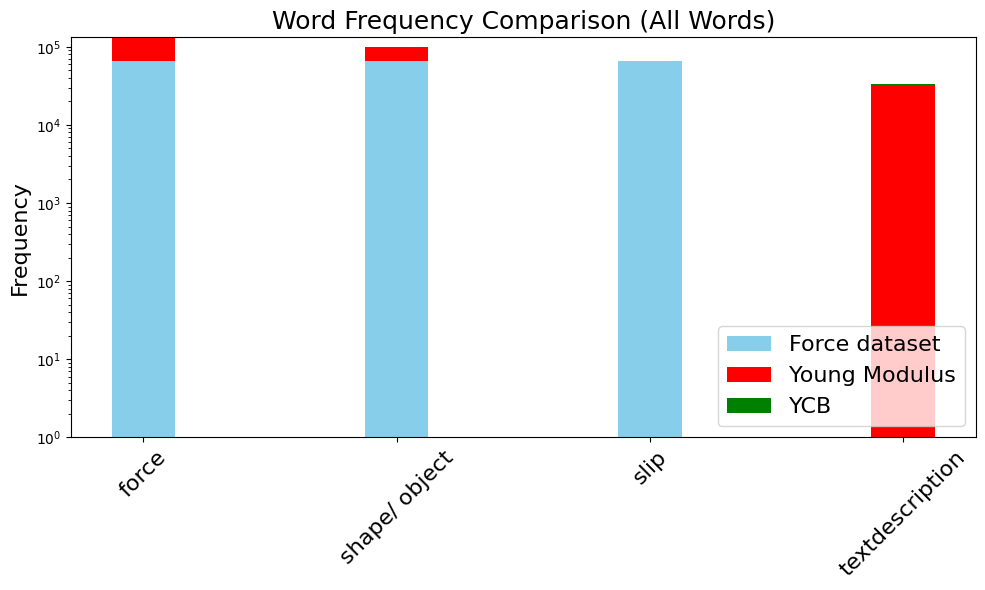

In [ ]:
print(classes)
print(classes2)
print(classes3)
epsilon = 1
vals1 = [classes.get(k, 0)+epsilon for k in all_keys]
vals2 = [classes2.get(k, 0)+epsilon for k in all_keys]
vals3 = [classes3.get(k, 0)+epsilon for k in all_keys]

plt.figure(figsize=(10,6))
plt.bar(x, vals1, width, color="skyblue", label="Force dataset")
plt.bar(x, vals2, width, bottom=vals1, color="red", label="Young Modulus")
plt.bar(x, vals3, width, bottom=np.array(vals1)+np.array(vals2), color="green", label="YCB")
plt.xticks(x, all_keys, fontsize=16, rotation=45)
plt.yscale("linear")  # optional
plt.ylabel("Frequency", fontsize=16)
plt.yscale("log")  # optional
#plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.title("Word Frequency Comparison (All Words)", fontsize=18)
plt.tight_layout()
plt.savefig("/its/home/drs25/Tactile_Language_Model/data/plots/wordfreq.pdf")
plt.show()

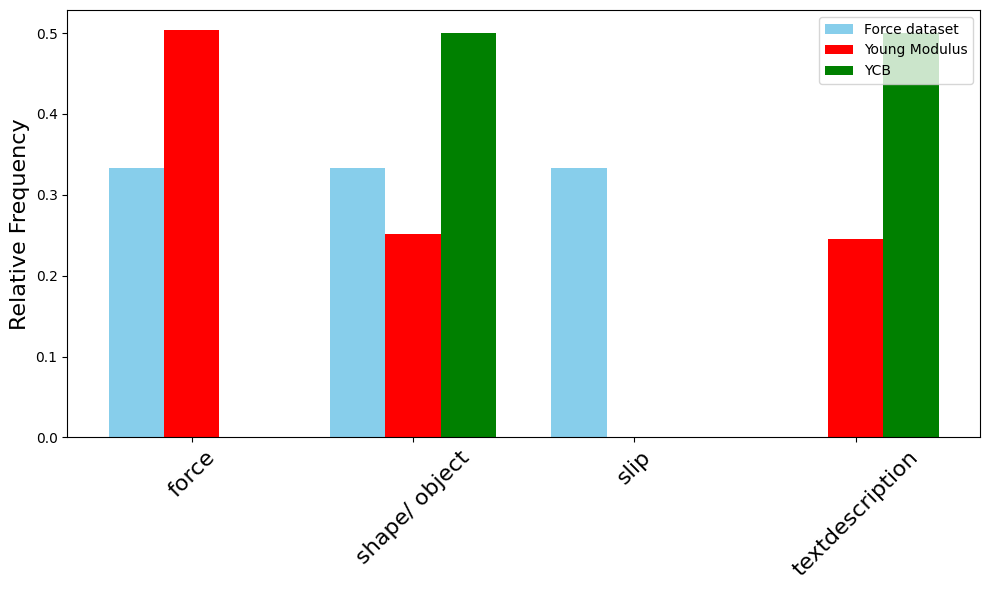

In [ ]:
vals1_norm = np.array(vals1)/sum(vals1)
vals2_norm = np.array(vals2)/sum(vals2)
vals3_norm = np.array(vals3)/sum(vals3)

plt.figure(figsize=(10,6))
plt.bar(x - width, vals1_norm, width, color="skyblue", label="Force dataset")
plt.bar(x, vals2_norm, width, color="red", label="Young Modulus")
plt.bar(x + width, vals3_norm, width, color="green", label="YCB")
plt.xticks(x, all_keys, fontsize=16, rotation=45)
plt.ylabel("Relative Frequency", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


## Make ready

In [ ]:
def rescale(ar_of_data):
    # Find smallest dimension
    smallest_dim = np.inf
    dim_s = (0, 0)
    for arr in ar_of_data:
        if len(arr.shape) < 2:
            continue  # skip invalid arrays
        dim = arr.shape[-2:]
        if dim[0]*dim[1] < smallest_dim:
            smallest_dim = dim[0]*dim[1]
            dim_s = dim

    X = []
    for arr in ar_of_data:
        print("Converting", arr.shape[-2:], "to", dim_s)
        if arr.shape[-2:] != dim_s:
            x_resized = []
            for j in range(len(arr)):
                x_resized.append(cv2.resize(arr[j], (dim_s[1], dim_s[0]), interpolation=cv2.INTER_AREA))
            X.extend(x_resized)
        else:
            X.extend(arr)
    return np.array(X)

print(x1.shape,x2.shape,x3.shape)
X=rescale([x1,x2,x3])
del x1,x2,x3

Converting (320, 240) to (320, 240)
Converting (250, 350) to (320, 240)


In [ ]:
np.save("/mnt/data0/drs25/data/gelsight_language/X_data",X)
with open("/mnt/data0/drs25/data/gelsight_language/y_data.pkl", "wb") as file:
    pickle.dump(my_list, file)

# Ready dataset

In [ ]:
import numpy as np
import pickle 

X=np.load("/mnt/data0/drs25/data/gelsight_language/X_data.npy")
with open("/mnt/data0/drs25/data/gelsight_language/y_data.pkl", "rb") as file:
    y = pickle.load(file)

print(X.shape)
print(y)